# 3.4 영화 리뷰 분류: 이진 분류 예제
- 텍스트 기반으로 긍정, 부정 분류

## 3.4.1 IMDB 데이터셋
- 리뷰 5만 개 데이터, 훈련:테스트 = 5:5, 긍정:부정 = 5:5
- 숫자 시퀀스 (각 숫자는 사전에 있는 고유한 단어)

In [1]:
from tensorflow.keras.datasets import imdb

# 가장 자주 나타나는 단어 10000개
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


- 0 : 부정
- 1 : 긍정

In [4]:
print(train_labels[0])

1


In [5]:
# 단어의 인덱스는 1만을 넘지 않음
max([max(sequence) for sequence in train_data])

9999

영어 단어로 바꾸는 방식

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 3.4.2 데이터 준비
- 신경망에 숫자 리스트를 넣을 수 없기 때문에 텐서로 바꿔줘야함
    - 같은 길이가 되도록 리스트에 패딩을 추가하고 `(samples, sequence_length)` 크기의 정수 텐서로 변환
    - 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환

In [2]:
# 원-핫 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [3]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

## 3.4.3 신경망 모델 만들기
- 입력 데이터가 벡터, 레이블은 스칼라(0, 1)인 문제에 잘 작동하는 네트워크 종류는 `relu` 활성화 함수를 사용한 완전 연결 층(`Dense`)을 사용한 것
- 은닉 유닛을 늘리면 더욱 복잡한 표현을 학습할 수 있으나 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있음 (훈련 데이터 성능은 향상되지만 테스트 데이터에서는 그렇지 않은 상황)
- `Dense` 층을 쌓을 때 중요한 결정 사항
    - 얼마나 많은 층을 사용할 것인가
    - 각 층에 얼마나 많은 은닉 유닛을 둘 것인가

In [13]:
def relu(x):
    assert x.ndim == 1
    x = x.copy()
    for i in range(len(x)):
        x[i] = max(x[i], 0)
    return x

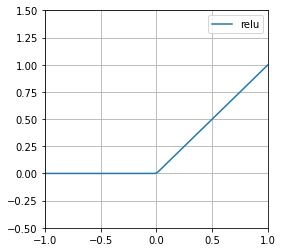

In [17]:
import matplotlib.pyplot as plt

xs = np.linspace(-1, 1, 100)
ys = relu(xs)
plt.figure(figsize=(4, 4))
plt.grid()
plt.plot(xs, ys)
plt.xlim((-1, 1))
plt.ylim((-0.5, 1.5))
plt.legend(['relu'])
plt.show()

In [18]:
def sigmoid(x):
    y_hat = 1 / (1 + np.exp(-x))
    return y_hat

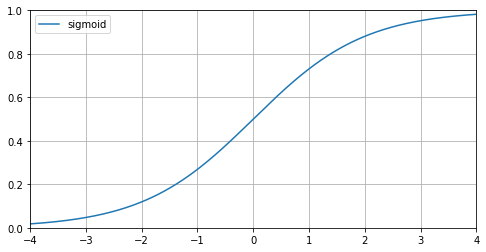

In [21]:
xs = np.linspace(-4, 4, 300)
ys = sigmoid(xs)
plt.figure(figsize=(8, 4))
plt.grid()
plt.plot(xs, ys)
plt.xlim((-4, 4))
plt.ylim((0, 1))
plt.legend(['sigmoid'])
plt.show()

### 모델 정의하기
- 이진 분류이므로 `sigmoid` 사용
- 활성화 함수가 필요한 이유
    - `relu` 같은 함수(비선형 함수)가 없다면 선형적인 연산으로만 구성되어 층을 여러 개로 구성하는 장점이 없음
    - `relu`, `prelu`, `elu` 등 다양한 활성화 함수가 있음
        - `elu` : 최대 -1 까지 출력, 변종으로 `selu`가 있음
        - `leaky relu` : 매개변수로 지정한 값에 비례해서 음수 값을 통과시킴
        - `prelu` : `leaky relu`의 변종으로 훈련하는 동안 비례의 정도를 학습함
        - `layers` 패키지 클래스로 `models.add(LeakyReLU())`처럼 사용

In [22]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 모델 컴파일
- 이진 분류이므로 loss로 `binary_crossentropy` 사용
    - `mean_squared_error`도 사용할 수 있긴 함
- **크로스엔트로피**(Crossentropy) : 정보 이론(Information Theory) 분야에서 온 개념으로 확률 분포 간의 차이를 측정
    - 원본 분포와 예측 분포 사이를 측정

In [23]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

- 매개변수를 변경하거나 자신만의 손실 함수, 측정 함수를 쓰는 경우 아래와 같이 컴파일
    - 매개 변수

```python
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001)
             loss='binary_crossentropy',
             metrics=['accuracy'])
```
  
    - 손실, 측정 함수

```python
from tensorflow.keras import losses, metrics

model.compile(optimizer='rmsprop',
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])
```

## 3.4.4 훈련 검증
- 1만 개의 데이터를 떼어네어 검증용으로 사용

In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 훈련하기
- `validation_data` 매개 변수에 검증 데이터 전달

In [25]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.5090 - accuracy: 0.7998 - val_loss: 0.3871 - val_accuracy: 0.8728
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3099 - accuracy: 0.9007 - val_loss: 0.3293 - val_accuracy: 0.8729
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2269 - accuracy: 0.9307 - val_loss: 0.3172 - val_accuracy: 0.8728
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1845 - accuracy: 0.9403 - val_loss: 0.2746 - val_accuracy: 0.8927
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1477 - accuracy: 0.9540 - val_loss: 0.2771 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1227 - accuracy: 0.9651 - val_loss: 0.3236 - val_accuracy: 0.8761
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1011 - accuracy: 0.9707 - val_loss: 0.3017 - val_accuracy: 0.8828
Epoch 8/20
30

### `History` 객체
- `model.fit()` 메서드는 `History` 객체를 반환하며 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 `history` 속성을 가지고 있음

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 훈련과 검증 손실 그리기

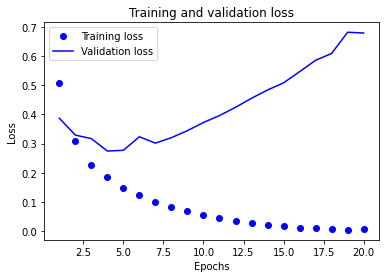

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련과 검증 정확도 그리기

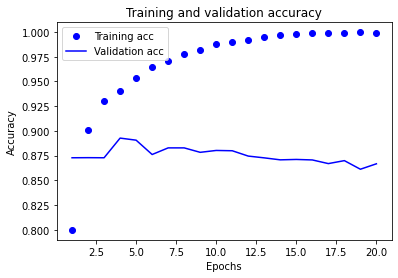

In [28]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- **과대적합** : 훈련 데이터에 과도하게 최적화되어 훈련 세트 이외의 데이터에는 일반화되지 못함
- epoch 수를 줄이는 것도 한 가지 방법

### 모델을 처음부터 다시 훈련하기

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 1s 9ms/step - loss: 0.5529 - accuracy: 0.7537
Epoch 2/4
30/30 [==============================] - 0s 9ms/step - loss: 0.3283 - accuracy: 0.9011
Epoch 3/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2339 - accuracy: 0.9251
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2967 - accuracy: 0.8813


## 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기
- `predict` 메서드 사용
- 이진 분류에서 레이블이 1인 경우를 양성(positive), 0인 경우를 음성(negative) 샘플이라 하며 예측하려는 대상이 양성
- 어떤 데이터에 대해선 확신을 가지지만(0.999) 어떤 데이터에 대해선 그렇지 못함(0.611)

In [30]:
model.predict(x_test)

array([[0.22636923],
       [0.9998023 ],
       [0.9391319 ],
       ...,
       [0.10454089],
       [0.13576749],
       [0.61105675]], dtype=float32)

## 3.4.6 추가 실험

### 1. 1개 또는 3개의 은닉층 사용

#### 1개의 은닉층
- 88~9%의 정확도

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 2s 31ms/step - loss: 0.4962 - accuracy: 0.8016 - val_loss: 0.3917 - val_accuracy: 0.8632
Epoch 2/4
30/30 [==============================] - 0s 16ms/step - loss: 0.3166 - accuracy: 0.9039 - val_loss: 0.3270 - val_accuracy: 0.8801
Epoch 3/4
30/30 [==============================] - 0s 14ms/step - loss: 0.2446 - accuracy: 0.9244 - val_loss: 0.3039 - val_accuracy: 0.8795
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2935 - accuracy: 0.8844


#### 3개의 은닉층
- 87~88%의 정확도

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 1s 31ms/step - loss: 0.5412 - accuracy: 0.7879 - val_loss: 0.3942 - val_accuracy: 0.8711
Epoch 2/4
30/30 [==============================] - 0s 16ms/step - loss: 0.3078 - accuracy: 0.8999 - val_loss: 0.2985 - val_accuracy: 0.8868
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.2088 - accuracy: 0.9326 - val_loss: 0.2854 - val_accuracy: 0.8855
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3287 - accuracy: 0.8690


### 2. 층의 은닉 유닛을 추가

#### 32개
- 86%의 정확도

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 1s 32ms/step - loss: 0.4912 - accuracy: 0.7758 - val_loss: 0.3736 - val_accuracy: 0.8528
Epoch 2/4
30/30 [==============================] - 0s 16ms/step - loss: 0.2746 - accuracy: 0.9017 - val_loss: 0.3343 - val_accuracy: 0.8640
Epoch 3/4
30/30 [==============================] - 0s 16ms/step - loss: 0.1987 - accuracy: 0.9299 - val_loss: 0.2738 - val_accuracy: 0.8885
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3591 - accuracy: 0.8612


#### 64개
- 86~87%의 정확도

In [5]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 2s 32ms/step - loss: 0.4890 - accuracy: 0.7751 - val_loss: 0.3345 - val_accuracy: 0.8699
Epoch 2/4
30/30 [==============================] - 0s 16ms/step - loss: 0.2564 - accuracy: 0.9057 - val_loss: 0.2787 - val_accuracy: 0.8903
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.1933 - accuracy: 0.9295 - val_loss: 0.2822 - val_accuracy: 0.8874
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8661


### 3. `binary_crossentropy` 대신 `mse` 손실 함수 사용
- 87~88%의 정확도

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 1s 30ms/step - loss: 0.1757 - accuracy: 0.7941 - val_loss: 0.1241 - val_accuracy: 0.8735
Epoch 2/4
30/30 [==============================] - 0s 14ms/step - loss: 0.0969 - accuracy: 0.9007 - val_loss: 0.0965 - val_accuracy: 0.8873
Epoch 3/4
30/30 [==============================] - 0s 16ms/step - loss: 0.0677 - accuracy: 0.9285 - val_loss: 0.0866 - val_accuracy: 0.8905
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.8741


### 4. `relu` 대신 `tanh` 활성화 함수 사용
- `tanh` : 초창기 신경망에서 인기 있었던 함수
- 87~88%의 정확도

In [5]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 2s 32ms/step - loss: 0.4689 - accuracy: 0.7964 - val_loss: 0.3483 - val_accuracy: 0.8743
Epoch 2/4
30/30 [==============================] - 0s 16ms/step - loss: 0.2645 - accuracy: 0.9131 - val_loss: 0.3015 - val_accuracy: 0.8771
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.1950 - accuracy: 0.9319 - val_loss: 0.2766 - val_accuracy: 0.8866
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3082 - accuracy: 0.8773
